In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
plt.style.use('ggplot')
%matplotlib inline
from tqdm import tqdm
pd.options.display.max_columns=100

In [48]:
data = pd.read_csv('Dyadic_COW_4.0.csv')
data = data.iloc[:,2:7]
data.head()

,year,importer1,importer2,flow1,flow2
0,1920,United States of America,Canada,611.85999,735.47998
1,1921,United States of America,Canada,335.44000,442.98999
2,1922,United States of America,Canada,364.01999,502.84000
3,1923,United States of America,Canada,416.00000,598.14001
4,1924,United States of America,Canada,399.14001,496.32001


Now, a first step is to reshape the data so that the flow2 column is below flow 1.

In [5]:
# Data flow1
data_flow_1 = data.loc[:, ['year', 'importer1', 'importer2', 'flow1']]
data_flow_2 = data.loc[:, ['year', 'importer1', 'importer2', 'flow2']]
data_flow_1.columns = ['year', 'Country_A', 'Country_B', 'flow']
data_flow_2.columns = ['year', 'Country_B', 'Country_A', 'flow']
# Dataset in good shape
df = pd.concat([data_flow_1, data_flow_2]).sort_index().reset_index(drop=True)
df.head()

,Country_A,Country_B,flow,year
0,United States of America,Canada,611.85999,1920
1,Canada,United States of America,735.47998,1920
2,United States of America,Canada,335.44000,1921
3,Canada,United States of America,442.98999,1921
4,United States of America,Canada,364.01999,1922


The flow represents the imports of Country_A from Country_B, in US millions of current dollars.

### Descriptive statistics about the evolution of the network

In [6]:
n_nodes = []
n_edges = []
for i in range(1950,2015):
    data_more_1950 = df.loc[np.where(df.year==i)[0], :]
    n_nodes.append(data_more_1950['Country_A'].nunique())
    n_edges.append(len(data_more_1950))

In [7]:
df_resume = pd.DataFrame({'year':[i for i in range(1950,2015)], 'Nb_nodes': n_nodes, 'Nb_edges':n_edges})

Text(0,0.5,'Number of nodes')

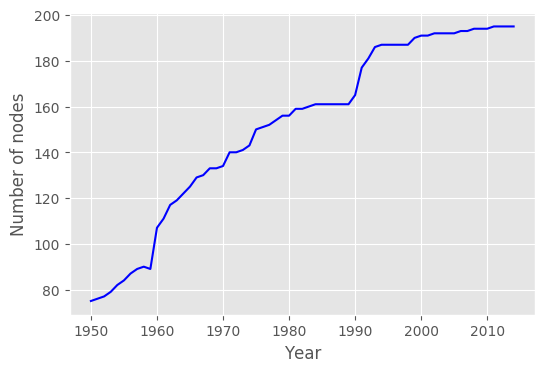

In [21]:
plt.plot(df_resume.year, df_resume.Nb_nodes, c = 'blue')
plt.xlabel('Year')
plt.ylabel('Number of nodes')

The number of country in the network increases.

Text(0,0.5,'Number of edges')

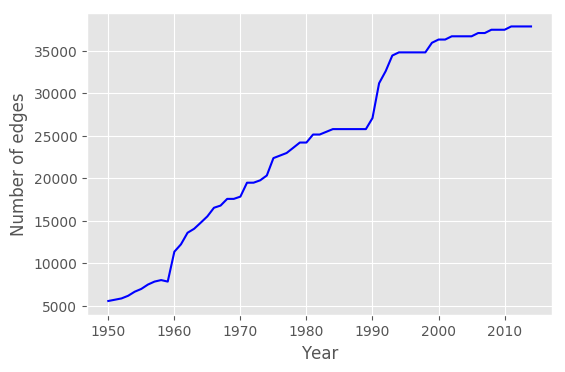

In [22]:
plt.plot(df_resume.year, df_resume.Nb_edges, c = 'blue')
plt.xlabel('Year')
plt.ylabel('Number of edges')

The number of exchanges increases.

Text(0,0.5,'Number of exchanges per country')

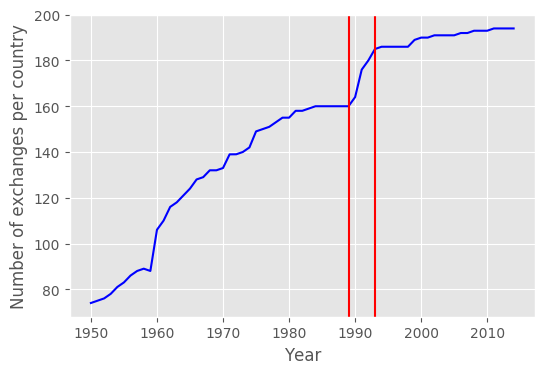

In [20]:
plt.plot(df_resume.year, df_resume.Nb_edges / df_resume.Nb_nodes, c = 'blue')
plt.axvline(x=1989, c = 'red')
plt.axvline(x=1993, c = 'red')
plt.xlabel('Year')
plt.ylabel('Number of exchanges per country')

The number of relation per country increases.

We can notice a drop in the years 1989-1993. It can come from the explosion of URSS. I will verify it.

In [31]:
lost_countries = list(set(df.loc[np.where(df.year==1989)[0],:].Country_A) - 
                      set(df.loc[np.where(df.year==1993)[0],:].Country_A))
new_countries = list(set(df.loc[np.where(df.year==1993)[0],:].Country_A) - 
                      set(df.loc[np.where(df.year==1989)[0],:].Country_A))

In [35]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
# Get coordinated of new countries
coordinates_new_countries = []
for i in new_countries:
    try:
        location = geolocator.geocode(i)
        coordinates_new_countries.append((location.latitude, location.longitude))
    except:
        coordinates_new_countries.append(('lat not found', 'lon not found'))
# Get coordinated of lost countries
coordinates_lost_countries = []
for i in lost_countries:
    try:
        location = geolocator.geocode(i)
        coordinates_lost_countries.append((location.latitude, location.longitude))
    except:
        coordinates_lost_countries.append(('lat not found', 'lon not found'))

In [74]:
df = pd.DataFrame({'Name': new_countries, 'lat': [i[0] for i in coordinates_new_countries], 'long': [i[1] for i in coordinates_new_countries]})

In [86]:
data = [ dict(
        type = 'scattergeo',
        lon = df['long'],
        lat = df['lat'],
        text = df['Name'],
        mode = 'markers',
        marker = dict(
            size = 3,
            opacity = 1,
            reversescale = True,
            autocolorscale = False,
            symbol = 'square',
            color='red'
        ))]

layout = dict(
        title = 'New countries between 1989 and 1993',
        colorbar = True,
        geo = dict(
            scope = 'europe',
            projection=dict( type='mollweide' ),
            showland = True,
            landcolor = "rgb(250, 250, 250)",
            subunitcolor = "rgb(217, 217, 217)",
            countrycolor = "rgb(217, 217, 217)",
            countrywidth = 0.5,
            subunitwidth = 0.5
        ),
    )

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False)